In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, normaltest

In [4]:
# laoding the dataset
df = pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [11]:
# to get the count of each unique value

df['Company'].value_counts()

Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

In [13]:
# numerical stats summary
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [25]:
# Rename columns to lowercase with underscores
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head(3)

,company_name,age_years,annual_salary,city,country_name,gender_identity
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0


In [27]:
#Q2
# Checking for Missing values
df.isnull().sum()

company_name        8
age_years          18
annual_salary      24
city               14
country_name        0
gender_identity     0
dtype: int64

In [35]:
#treating 
# filling using the median and mode  column
df['age_years'].fillna(df['age_years'].median(), inplace = True)
df['company_name'].fillna(df['company_name'].mode()[0],inplace = True)
df['annual_salary'].fillna(df['annual_salary'].median(),inplace = True)
df['city'].fillna(df['city'].mode()[0],inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11052\2448266808.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_years'].fillna(df['age_years'].median(), inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11052\2448266808.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [37]:
df.isnull().sum()

company_name       0
age_years          0
annual_salary      0
city               0
country_name       0
gender_identity    0
dtype: int64

In [39]:
# checking for duplicates
df.duplicated().sum()

4

In [41]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [43]:
# checking for duplicates
df.duplicated().sum()

0

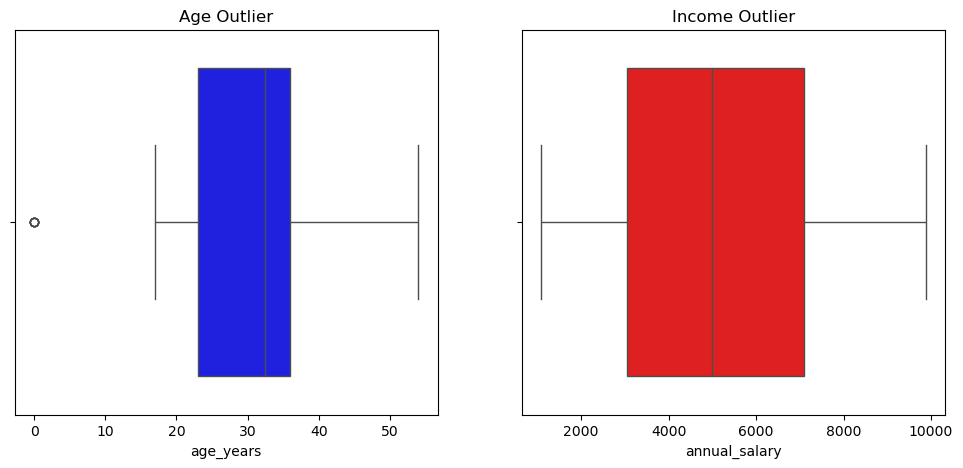

In [47]:
#find outliers
# checking for outliers on age_years and annual_salary column
# check for Outliers
# Using box plot
fig, axes = plt.subplots(1,2,figsize = (12,5))
sns.boxplot(x=df['age_years'], ax = axes[0], color = 'blue').set_title('Age Outlier')
sns.boxplot(x=df['annual_salary'], ax = axes[1], color = 'red').set_title('Income Outlier')
plt.show()

In [59]:
#replace the value of age 
df['age_years'].replace(0, np.nan, inplace=True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_11052\119657217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_years'].replace(0, np.nan, inplace=True)


,company_name,age_years,annual_salary,city,country_name,gender_identity
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [61]:
#removing null values
df['age_years'].fillna(df['age_years'].median(), inplace=True)
df['annual_salary'].fillna(df['annual_salary'].median(), inplace=True)


df['company_name'].fillna(df['company_name'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['country_name'].fillna(df['country_name'].mode()[0], inplace=True)
df['gender_identity'].fillna(df['gender_identity'].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_11052\4209151625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_years'].fillna(df['age_years'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11052\4209151625.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [63]:
print(df.isnull().sum())


company_name       0
age_years          0
annual_salary      0
city               0
country_name       0
gender_identity    0
dtype: int64


In [67]:
#Q3 data analysis
#filter the data
filtered_df = df[(df['age_years'] > 40) & (df['annual_salary'] < 5000)]
filtered_df

,company_name,age_years,annual_salary,city,country_name,gender_identity
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


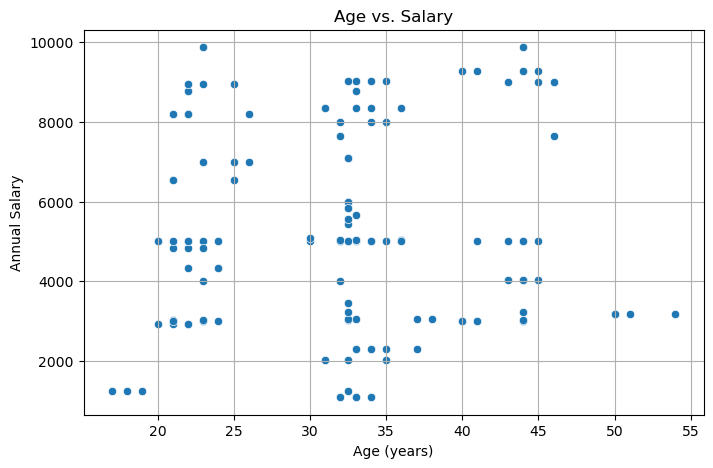

In [69]:
#plot the chart with age and salary with scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age_years', y='annual_salary', data=df)
plt.title('Age vs. Salary')
plt.xlabel('Age (years)')
plt.ylabel('Annual Salary')
plt.grid(True)
plt.show()

In [71]:
#count the peopel in each places
place_counts = df['city'].value_counts()
print(place_counts)

city
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


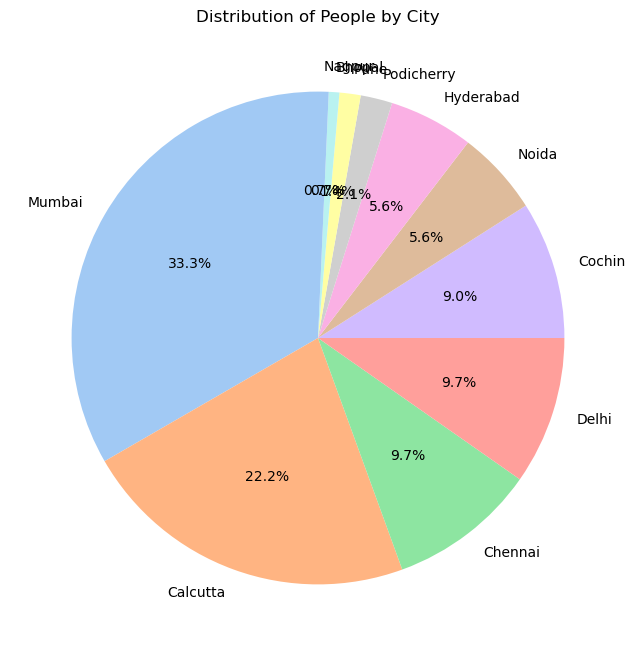

In [73]:
#visulaize the count using pie chart
plt.figure(figsize=(8, 8))
place_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of People by City')
plt.ylabel('')
plt.show()

In [105]:
# for xtrain and x test splitting
from sklearn.model_selection import train_test_split

# for scaling and onehot encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# for column transformation
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

In [81]:
# for label encoder
from sklearn.preprocessing import LabelEncoder

In [83]:
# Encoding and Scaling
ohe = OneHotEncoder(sparse_output=False) # one hot encoder

scaler = StandardScaler() # scaling

In [85]:
# Classifying the variables

categorical_features = ['company_name','city','country_name']

# numerical features

numerical_features = ['age_years','annual_salary','gender_identity']

In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_features),
        ('num', scaler, numerical_features)
    ]
)


In [101]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
X_train.head()

,company_name,age_years,annual_salary,city,gender_identity
125,TCS,33.0,5654.0,Mumbai,1
31,CTS,20.0,2934.0,Mumbai,0
99,CTS,44.0,9284.0,Podicherry,1
36,TCS,32.0,5000.0,Noida,0
16,Infosys,23.0,3030.0,Podicherry,0


In [97]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression())
])
